---

# Data visualisation with `pandas`

The `pandas` library doesn't just manipulate data, it can also visualise it.

In [1]:
import pandas as pd

In [2]:
loans = pd.read_csv("./data/loans.csv")

### Distributions

`pandas` supports different visualisations for looking at the distribution of our data.

In [3]:
loans.head()

,id,loan_amnt,term,issue_d,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose
0,130956066,3000.0,36 months,Mar-2018,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,major_purchase
1,130968727,5000.0,36 months,Mar-2018,11.98,166.03,B,B5,SDO Supervisor,10+ years,OWN,55000.0,other
2,130962380,20300.0,60 months,Mar-2018,17.47,509.66,D,D1,Administrative Assistant,< 1 year,RENT,55000.0,credit_card
3,130966492,30000.0,36 months,Mar-2018,21.85,1143.39,D,D5,teacher,10+ years,OWN,57000.0,debt_consolidation
4,130945448,5000.0,36 months,Mar-2018,5.31,150.56,A,A1,Clerical,2 years,RENT,36610.0,credit_card


The `.describe` method gives us some indication of the values in a column:

In [4]:
loans["loan_amnt"].describe()

count    42837.000000
mean     15367.714242
std      10231.349824
min       1000.000000
25%       7200.000000
50%      12250.000000
75%      21000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

But really we want to see the full distribution visually.

In most cases there is a plotting method we can add on to a `DataFrame` to visualise it.

For example, to see a histogram of a column, we can use `.hist()`:

<Axes: >

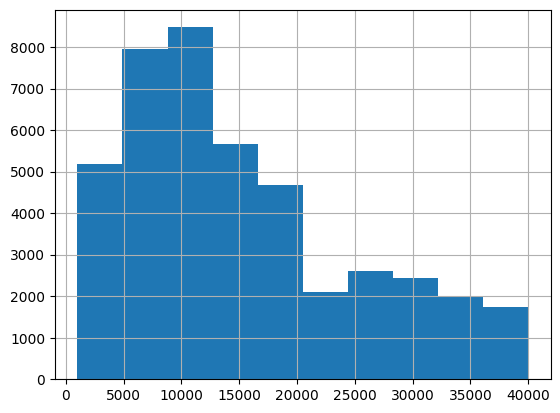

In [5]:
loans["loan_amnt"].hist()

The default options are usually pretty good, but we can change anything about the plot

<Axes: >

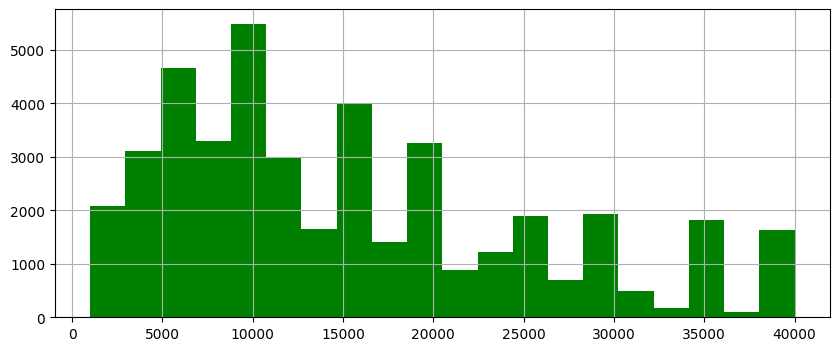

In [6]:
loans["loan_amnt"].hist(bins=20, color="green", figsize=(10, 4))

The `DataFrame` also has a `.hist()` method if you want a histogram *per group*.

We can also suppress the output (`.hist()` returns an array of axis objects) by either:

- adding a semicolon `;` to the end of the statement
- saving the output of the plotting function (in this case `.hist()`) into a variable we don't then use. The Python convention for that is to use `_`

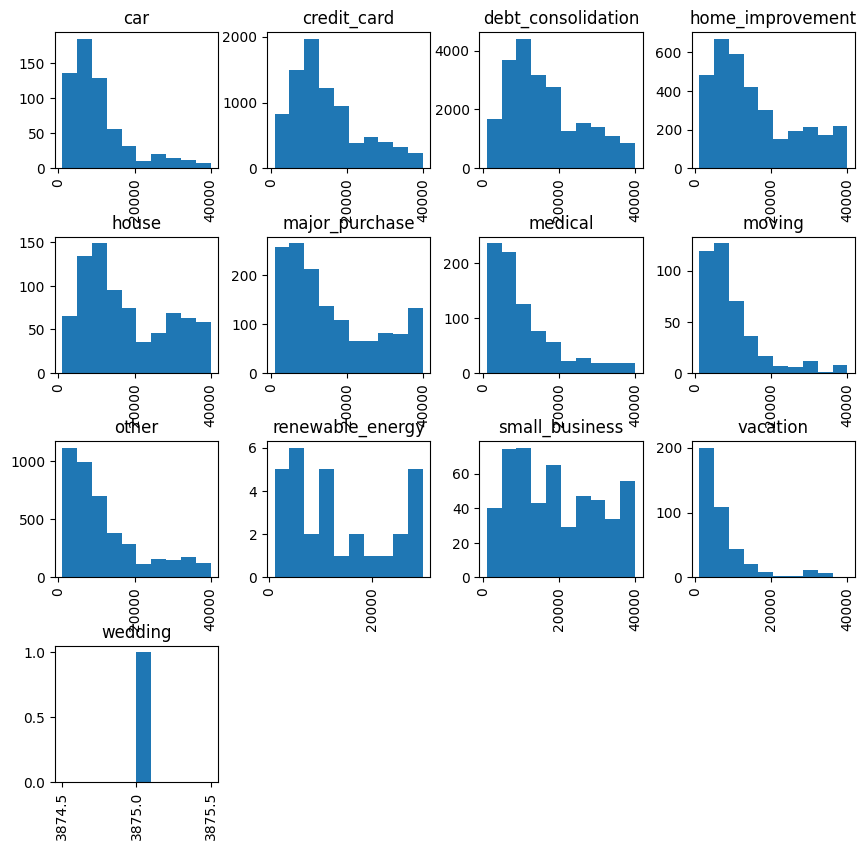

In [7]:
_ = loans.hist(column="loan_amnt", by="purpose", figsize=(10, 10))

#### Note

As a rule of thumb, if a plot requires a *single column* (e.g. a histogram of a single column), the plotting function will be called on the `Series`.

If a plot requires multiple columns (e.g. a scatterplot) the plotting function will be called on the `DataFrame`.

---

`pandas` also support box and whisker plots

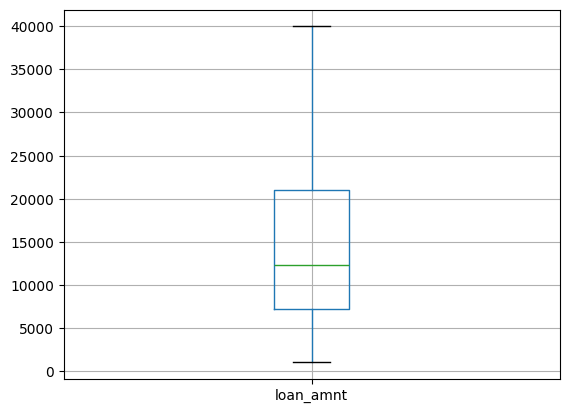

In [8]:
_ = loans.boxplot("loan_amnt")

Different plots have different options:

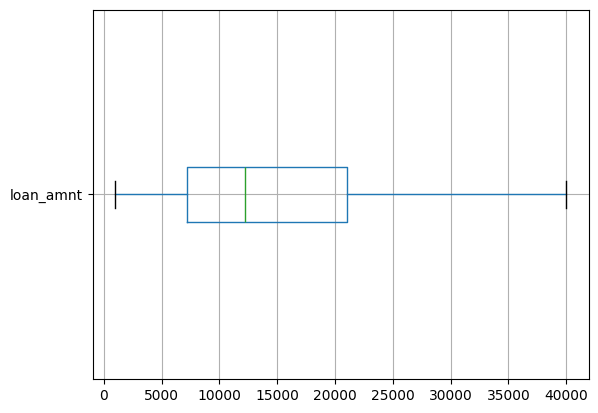

In [9]:
_ = loans.boxplot("loan_amnt", vert=False)

Box plots are also available at the dataset level, to visualise them per category

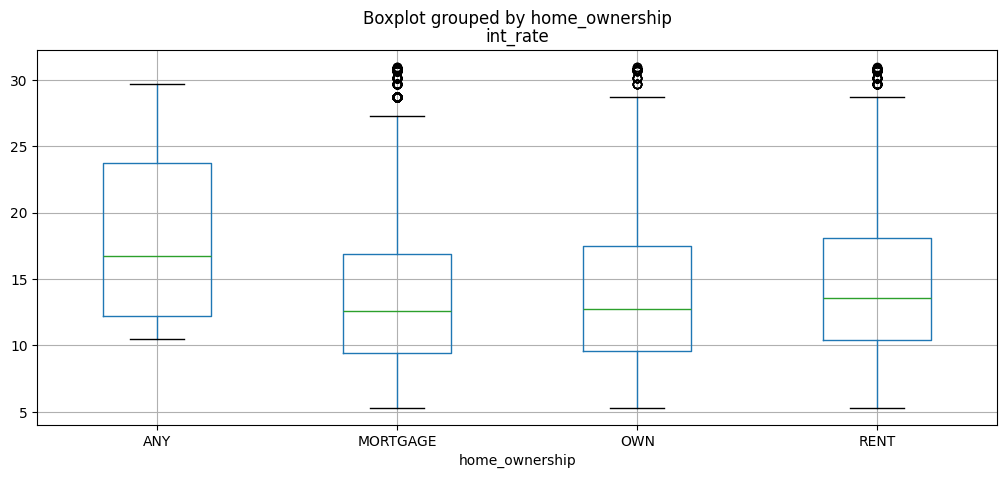

In [10]:
_ = loans.boxplot(column="int_rate", by="home_ownership", figsize=(12, 5))

### Bar charts

The trick with `pandas` plots is to make sure the data is the right format first. Then, it's usually a matter of calling the correct plotting function (sometimes it's just `.plot()`!).

For bar charts, if you have aggregated data, you can plot it as a bar chart with a simple command.

In [11]:
loans["grade"].value_counts().sort_index()

grade
A     8471
B    11172
C    11745
D     8173
E     2541
F      611
G      124
Name: count, dtype: int64

<Axes: xlabel='grade'>

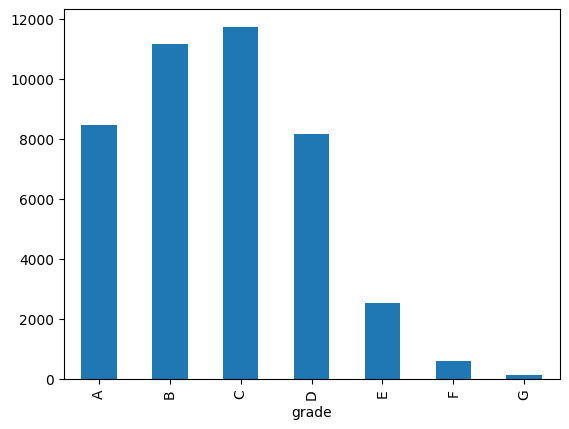

In [30]:
_ = loans["grade"].value_counts().sort_index().plot(kind="bar")

# can also do this:
loans["grade"].value_counts().sort_index().plot.bar()

The same can be done for any aggregated data

In [13]:
avg_loan_by_grade = loans.groupby("grade")["loan_amnt"].median()
avg_loan_by_grade

grade
A    10000.0
B    12000.0
C    13200.0
D    14800.0
E    15000.0
F    20000.0
G    20000.0
Name: loan_amnt, dtype: float64

To create a horizontal bar chart, use `"barh"`

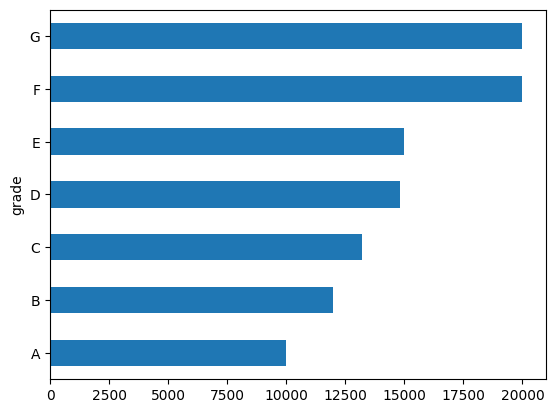

In [14]:
_ = avg_loan_by_grade.plot(kind="barh")

Ah, not quite! The trick here is to have the data in **reverse order** (because horizontal bar charts start from the x-axis and go *up*)

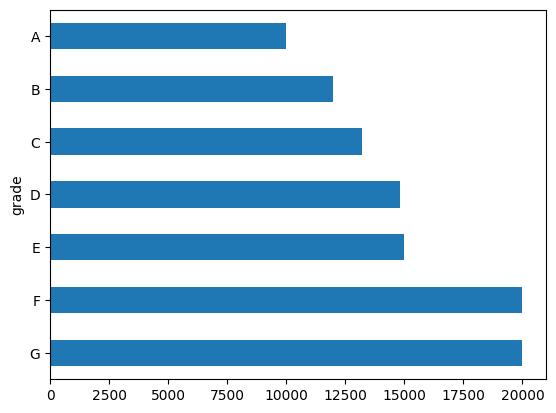

In [15]:
_ = avg_loan_by_grade.sort_index(ascending=False).plot(kind="barh")

<h1 style="color: #fcd805">Exercise: distributions and bar charts</h1>

Back to the Kickstarter dataset.

1. Read the Kickstarter data into a `DataFrame` (reminder: it's the `kickstarter.csv.gz` in the `data` folder)

In [20]:
ks = pd.read_csv("data/kickstarter.csv.gz")

2. Visualise the distribution of the goal amount across the entire dataset using a histogram.

What conclusions do you draw?

<Axes: >

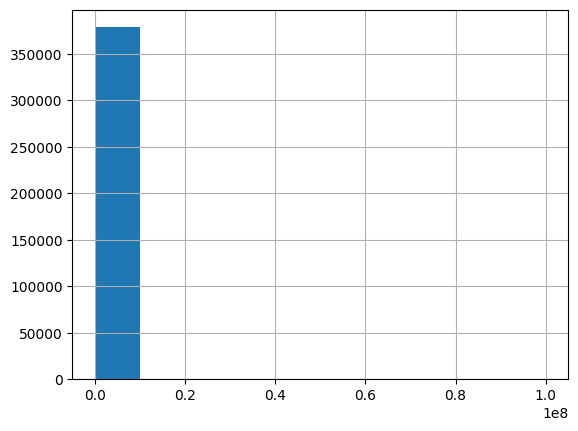

In [33]:
ks["goal"].hist()

In [21]:
ks.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0


3. Compare the distribution of the goal amount across different categories using boxplots.

What do you conclude?

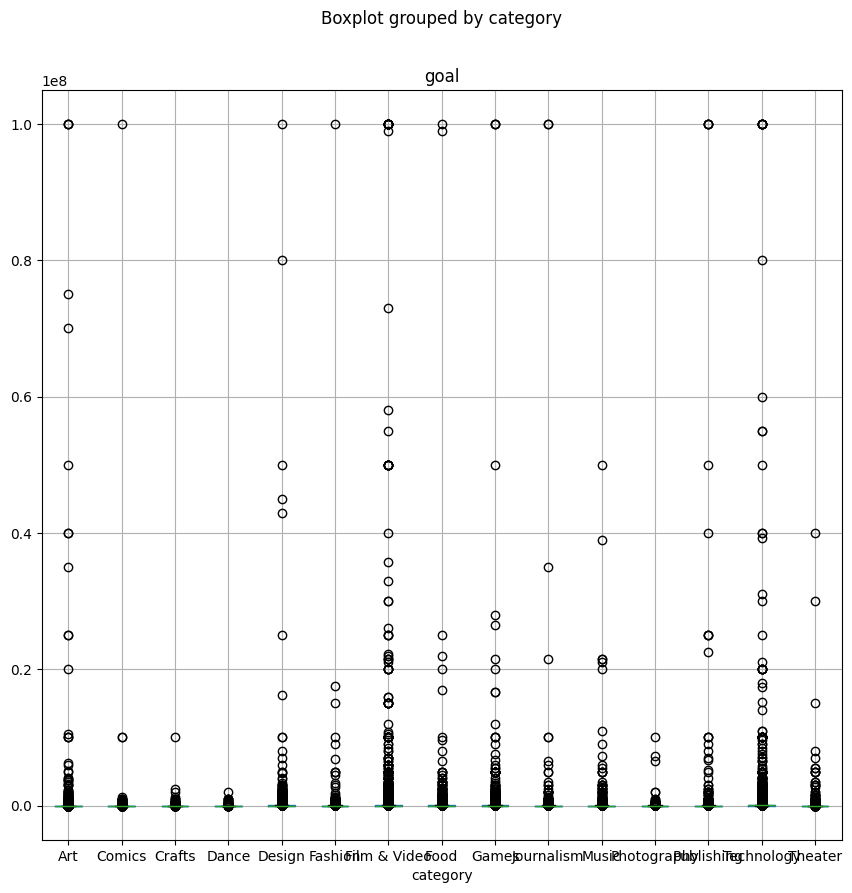

In [24]:
_ = ks.boxplot(column="goal", by="category", figsize=(10, 10))

4. Create a column to calculate the pledged amount as a percentage of the goal amount.

In [54]:
ks["pledged_pct"]= ks["pledged"] / ks["goal"]
ks[(ks["pledged_pct"]< 10 ) & ( ks["backers"]>100000 )]


,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,pledged_pct
292244,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.0,2014-05-28 15:05:45,5408916.95,successful,105857,US,5408916.95,5.408917


5. Visualise the *average* of this percentage for each "state" of projects, as a bar chart.

Each bar will represent the average "completion rate" of a project across successful and failed projects (and any other category that appears in the `state` column).

<Axes: xlabel='state'>

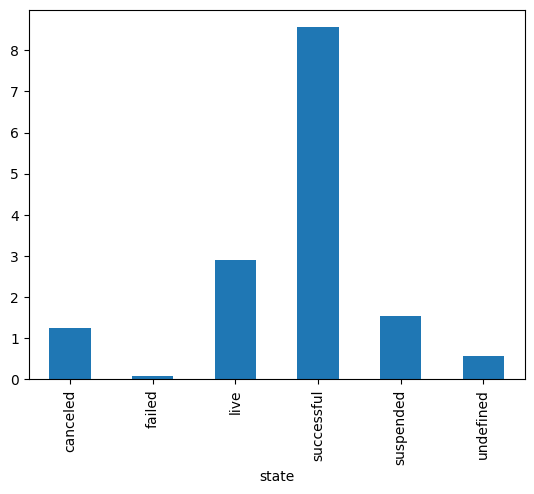

In [34]:
    ks.groupby("state")["pledged_pct"].mean().plot.bar()

## Scatter plots and correlation

To calculate correlation in our data, `pandas` has a built-in `.corr()` method.

In [35]:
loans.corr(numeric_only=True)

,id,loan_amnt,int_rate,installment,annual_inc
id,1.000000,-0.021893,0.069647,-0.017268,0.015805
loan_amnt,-0.021893,1.000000,0.081936,0.949917,0.223938
int_rate,0.069647,0.081936,1.000000,0.131050,-0.052575
installment,-0.017268,0.949917,0.131050,1.000000,0.221072
annual_inc,0.015805,0.223938,-0.052575,0.221072,1.000000


Some high correlation values, such as the size of the installment is obviously correlated with the size of the loan.

Looks like a person's annual income is also positively correlated with the size of the loan (and therefore the installment). At around 0.22, this isn't a strong relationship though.

Another way to assess the relationship between variables is to visualise it with a scatter plot:

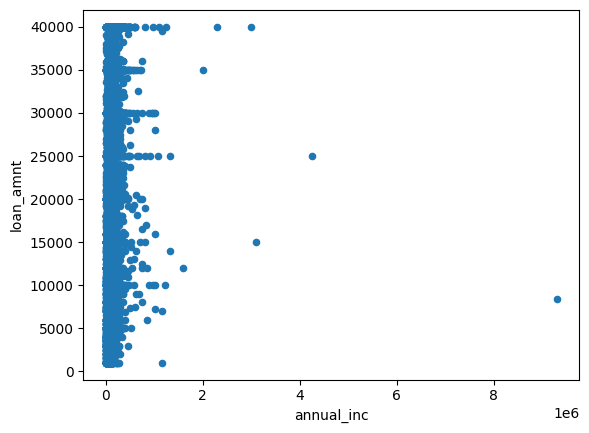

In [36]:
_ = loans.plot(kind="scatter", x="annual_inc", y="loan_amnt")

There are some outliers, so let's zoom in by removing them.

In `pandas`, don't try to do this in the plot itself, do it in the data before you plot (although, you could set the limits of the plot's axes after the fact as well).

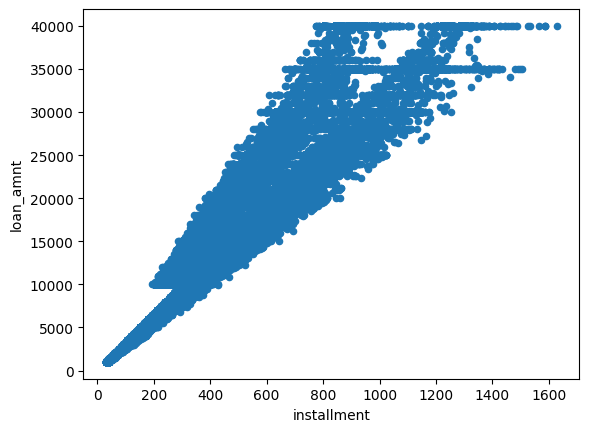

In [38]:
_ = loans[loans["annual_inc"] < 500_000].plot(kind="scatter", x="installment", y="loan_amnt")

That's better, but messy. We can change the transparency of the points to prevent "overplotting" and see denser areas.

In [ ]:
_ = loans[loans["annual_inc"] < 500_000].plot(kind="scatter", x="annual_inc", y="loan_amnt", alpha=0.2)

<h1 style="color: #fcd805">Exercise: scatter plots and correlation</h1>

Looking at the Kickstarter data, answer the following questions.

1. Is there a relationship between the goal amount and the amount that was pledged for a project?

Answer this question both numerically and visually.

In [39]:
ks.corr(numeric_only=True)

,ID,goal,pledged,backers,usd pledged,pledged_pct
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000838
goal,0.001679,1.000000,0.007358,0.004012,0.005534,-0.000472
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.008646
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.016606
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.006484
pledged_pct,-0.000838,-0.000472,0.008646,0.016606,0.006484,1.000000


2. Is there a relationship between the number of backers and the *percentage* of the goal that was reached?

Answer this question both numerically and visually.

_Note: you will need your created column for this from a previous exercise!_

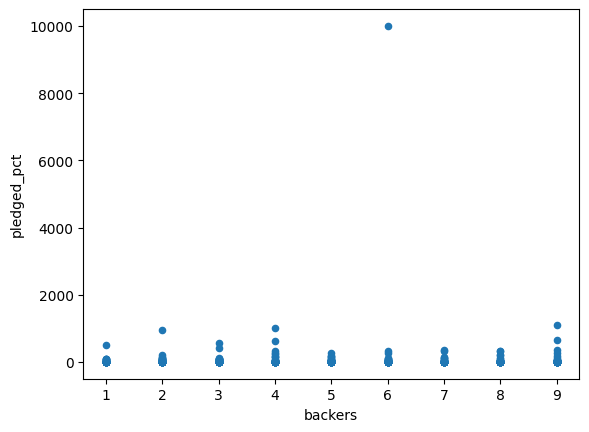

In [57]:
_ = ks[(ks["backers"] > 0)&(ks["backers"] < 10) ].plot(kind="scatter", x="backers", y="pledged_pct")

## Line charts & dates in `pandas`

Line charts are generally used for time series data.

For time series data, we need dates. Specifically, columns that are a date type.

In [78]:
loans.head()

,id,loan_amnt,term,issue_d,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose
0,130956066,3000.0,36 months,Mar-2018,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,major_purchase
1,130968727,5000.0,36 months,Mar-2018,11.98,166.03,B,B5,SDO Supervisor,10+ years,OWN,55000.0,other
2,130962380,20300.0,60 months,Mar-2018,17.47,509.66,D,D1,Administrative Assistant,< 1 year,RENT,55000.0,credit_card
3,130966492,30000.0,36 months,Mar-2018,21.85,1143.39,D,D5,teacher,10+ years,OWN,57000.0,debt_consolidation
4,130945448,5000.0,36 months,Mar-2018,5.31,150.56,A,A1,Clerical,2 years,RENT,36610.0,credit_card


We actually have a date disguised as a text column!

`pandas` can convert text to dates as long as we specify the format the dates are in.

How do you know what to put in the `format` section?

Here is the reference page: https://strftime.org/

In [79]:
# %b is "abbreviated month name", e.g. "Jan"
# %Y is year, e.g. 2014
loans["date"] = pd.to_datetime(loans["issue_d"], format="%b-%Y")

loans.head()

,id,loan_amnt,term,issue_d,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,date
0,130956066,3000.0,36 months,Mar-2018,7.34,93.10,A,A4,Scale Technician,9 years,RENT,52000.0,major_purchase,2018-03-01
1,130968727,5000.0,36 months,Mar-2018,11.98,166.03,B,B5,SDO Supervisor,10+ years,OWN,55000.0,other,2018-03-01
2,130962380,20300.0,60 months,Mar-2018,17.47,509.66,D,D1,Administrative Assistant,< 1 year,RENT,55000.0,credit_card,2018-03-01
3,130966492,30000.0,36 months,Mar-2018,21.85,1143.39,D,D5,teacher,10+ years,OWN,57000.0,debt_consolidation,2018-03-01
4,130945448,5000.0,36 months,Mar-2018,5.31,150.56,A,A1,Clerical,2 years,RENT,36610.0,credit_card,2018-03-01


In [80]:
loans.dtypes

id                         int64
loan_amnt                float64
term                      object
issue_d                   object
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_title                 object
emp_length                object
home_ownership            object
annual_inc               float64
purpose                   object
date              datetime64[ns]
dtype: object

Now that we have a date type, we can access date functionality of that column:

In [81]:
loans["date"].dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
42832    2018
42833    2018
42834    2018
42835    2018
42836    2018
Name: date, Length: 42837, dtype: int32

Let's look at monthly total loan amounts:

In [82]:
monthly_loans = loans.groupby(loans["date"])["loan_amnt"].sum()
monthly_loans

date
2018-01-01    111838200.0
2018-02-01     89364200.0
2018-03-01     93708000.0
2018-04-01     88067150.0
2018-05-01     82441600.0
2018-06-01     58085875.0
2018-07-01     48339675.0
2018-08-01     34770275.0
2018-09-01     22484025.0
2018-10-01     16365800.0
2018-11-01      9322475.0
2018-12-01      3519500.0
Name: loan_amnt, dtype: float64

Again, to visualise this, we can call the correct plot function. The default of `.plot()` is actually a line chart, so we don't need to specify anything else:

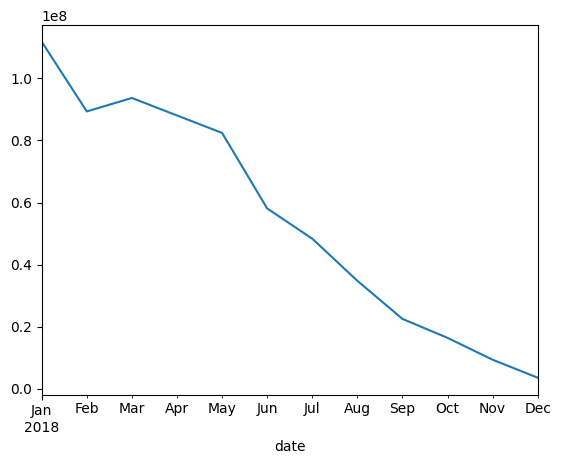

In [83]:
_ = monthly_loans.plot()

Looks like the plot defaulted to "scientific notation" on the y-axis.

To change this, we need to dive into the plotting library that `pandas` uses, to gain full control of our plots. We cannot do this if we only use the `.plot()` function in `pandas`.

The plotting library `pandas` uses under the hood is called `matplotlib` and the way to use it is to import its `pyplot` submodule.

For more information about `matplotlib` and the different ways to use this, you can refer to this excellent article: https://pbpython.com/effective-matplotlib.html

In [ ]:
import matplotlib.pyplot as plt

You can set global options for all plots, such as the default theme.

Themes are called "styles" in `matplotlib` and you can use the many different built-in ones or even create your own.

Here is the reference page with all available styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

For example, we could set all our plots to mimic the style of the political blog FiveThirtyEight:

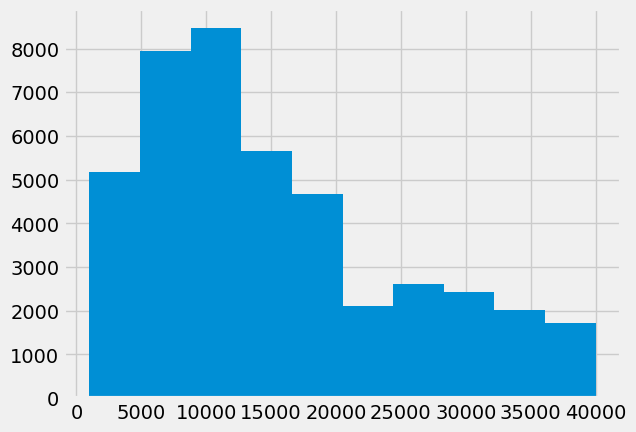

In [84]:
plt.style.use('fivethirtyeight')

_ = loans["loan_amnt"].hist()

And we can change it back

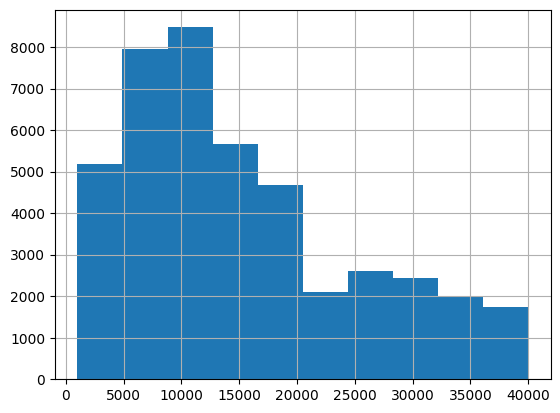

In [85]:
plt.style.use('default')

_ = loans["loan_amnt"].hist()

The real power of using `matplotlib` directly is that we can fully control all aspects of a chart.

In `matplotlib`, a **figure** is the entire chart area, and each set of axes inside it are an **axis**.

In this example, we have **one** figure and **seven** axes.

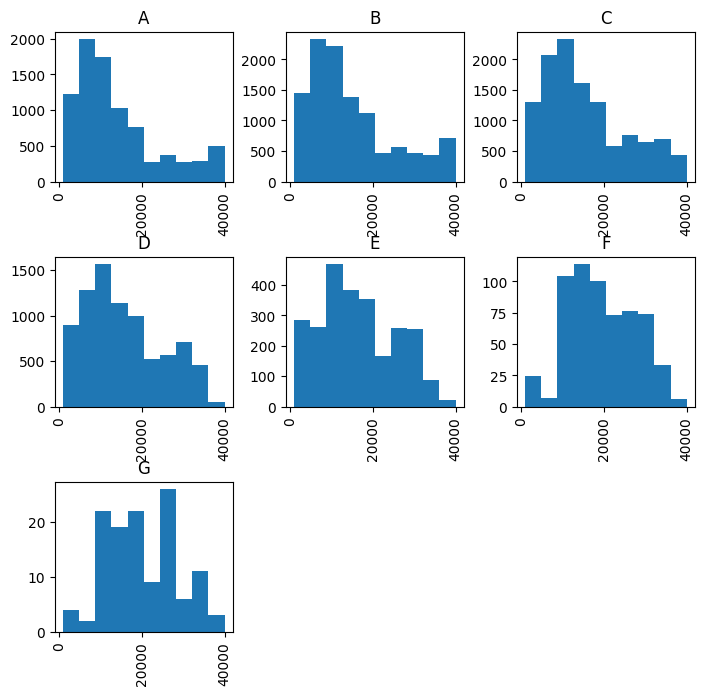

In [86]:
_ = loans.hist(column="loan_amnt", by="grade", figsize=(8, 8))

To gain full control, we need to *first* create a blank figure and axis (or multiple axes), and then tell the `pandas` plot function to use our figure and axis/axes rather than create its own.

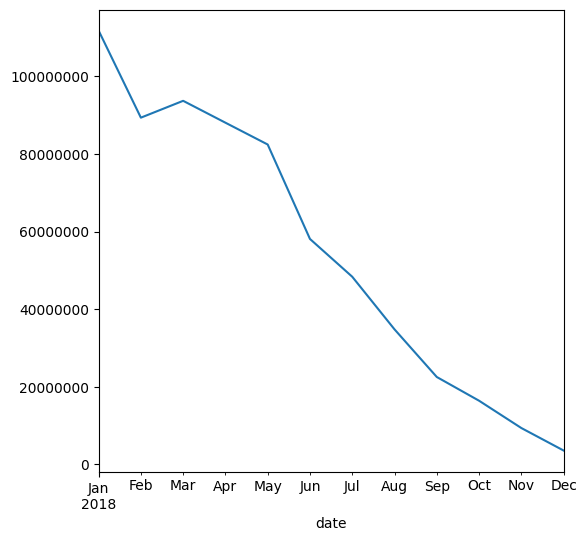

In [87]:
fig, axis = plt.subplots(figsize=(6, 6))

# tell the plot function what Axis object to use
monthly_loans.plot(ax=axis)

# one way to remove scientific notation
axis.ticklabel_format(axis="y", style="plain")

plt.show()

These are the Figure and Axis objects we can control:

In [ ]:
print(type(fig), type(axis))

Let's see what else we can do now we have our figure and axis:

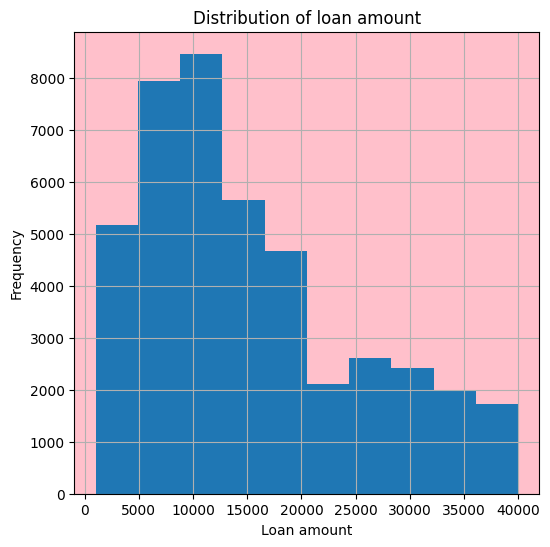

In [74]:
fig, axis = plt.subplots(figsize=(6, 6))

loans["loan_amnt"].hist(ax=axis)

# now we have full control of the figure and axis and can set all the options!

# you can set options individually
axis.set_facecolor("pink")

# or all at once!
axis.set(
    title="Distribution of loan amount",
    xlabel="Loan amount",
    ylabel="Frequency"
)

# .show() is not necessary in Jupyter, but it is outside of it
# and it suppresses the text output
plt.show()

Another trick is to create multiple axes (which gives you either a list, or a 2D array of axes)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# axes is now a list!
loans["loan_amnt"].hist(ax=axes[0])

# or all at once!
axes[0].set(
    title="Distribution of loan amount",
    xlabel="Loan amount",
    ylabel="Frequency"
)

loans.boxplot(column="int_rate", vert=False, ax=axes[1])

axes[1].set(
    title="Distribution of interest rate",
    xlabel="Interest rate (%)",
    ylabel=None
)

# remove the "tick" label from the box plot
axes[1].tick_params(axis="y", labelleft=False)

# .show() is not necessary in Jupyter, but it is outside of it
# and it suppresses the text output
plt.show()

<h1 style="color: #fcd805">Exercise: line charts</h1>

Back to our Kickstarter data.

1. Convert the `launched` column to be a date type.

In [69]:
ks.dtypes
ks.head()
ks["launched"]= pd.to_datetime(ks["launched"])
ks.dtypes
ks.head()

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,pledged_pct
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,0.065795


2. Calculate the *number of projects* per day using the `launched` column.

_Tip: if a datetime column has a time component, you can isolate just the date using `.dt.date`_

In [94]:
ks = ks[ks["launched"] > "2009-01-01"]
nks=ks.groupby(ks["launched"].dt.date)["ID"].count()
#ks["launched"].min()
nks

launched
2009-04-21     1
2009-04-23     1
2009-04-24     1
2009-04-25     1
2009-04-27     1
              ..
2017-12-29    58
2017-12-30    41
2017-12-31    42
2018-01-01    84
2018-01-02    40
Name: ID, Length: 3168, dtype: int64

3. Visualise the number of projects per day as a line chart.

Use `matplotlib` to create a figure and axis object and try lots of options to make your chart look unique!

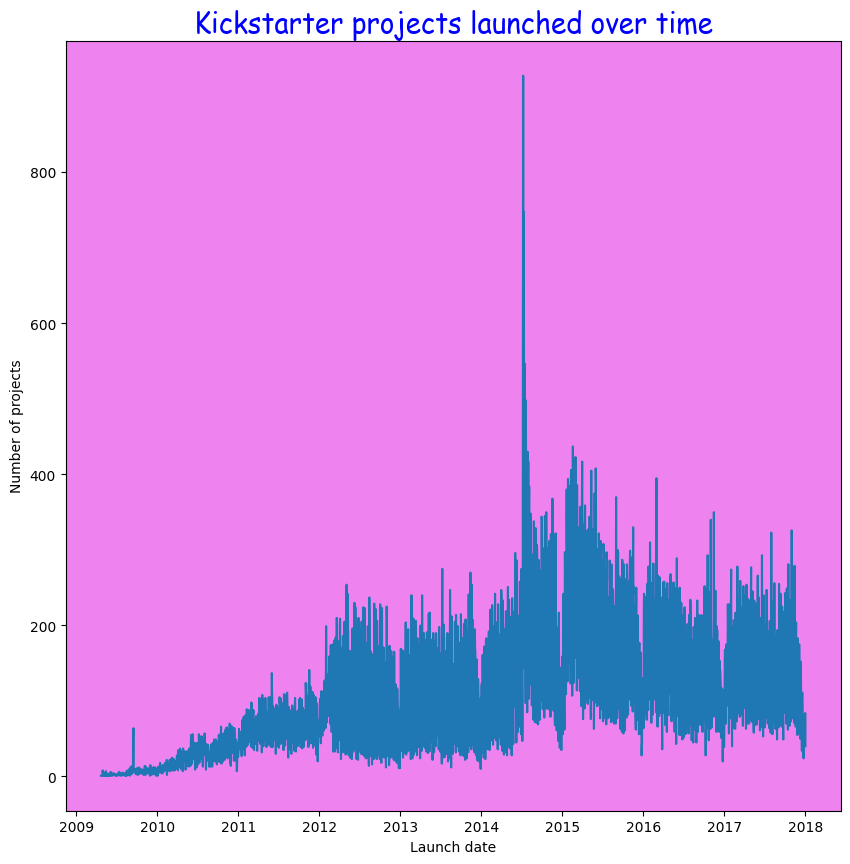

In [105]:
import matplotlib.pyplot as plt
fix, axis = plt.subplots(figsize = (10,10))
nks.plot(ax=axis)
axis.ticklabel_format(axis="y", style="plain")

axis.set(
    xlabel="Launch date",
    ylabel="Number of projects",
    facecolor="violet"
)

axis.set_title("Kickstarter projects launched over time",
               fontdict={
                   'fontsize': 20,
                   'fontname': "Comic Sans MS",
                   'color': "blue"
               })

plt.show()


### Other visualisation options

There are many other visualisation libraries in Python!

One popular complement to `matplotlib` is `seaborn` (https://seaborn.pydata.org). It has lots of interesting plot types and is fully compatible with `matplotlib`.

One thing that's easier in `seaborn` is to colour objects in the visualisation based on a column, such as colouring the points in a scatter plot based on a category:

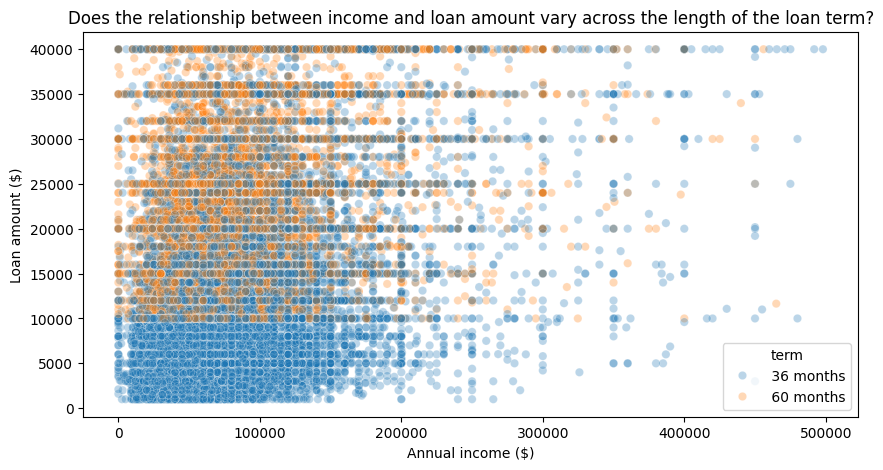

In [106]:
import seaborn as sns

fig, axis = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=loans[loans["annual_inc"] < 500_000],
                x="annual_inc",
                y="loan_amnt",
                hue="term",
                alpha=0.3,
                ax=axis)

axis.set(
    title="Does the relationship between income and loan amount vary across the length of the loan term?",
    xlabel="Annual income ($)",
    ylabel="Loan amount ($)"
)

plt.show()

Another useful `seaborn` visualisation is the heatmap. This colours any data table based on its values.

If you want to pick the right colour range (called a colormap) this is the documentation: https://matplotlib.org/stable/users/explain/colors/colormaps.html

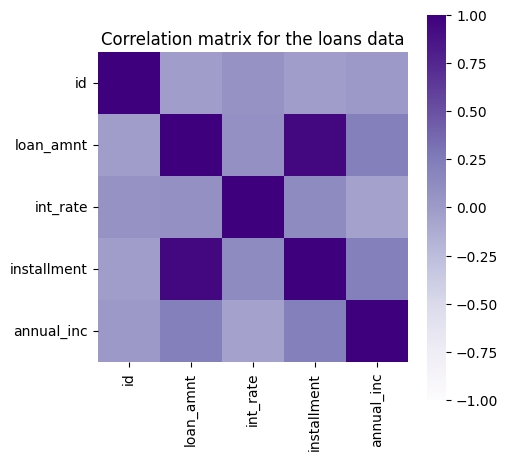

In [110]:
fig, axis = plt.subplots(figsize=(5, 5))

sns.heatmap(
    data=loans.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    square=True,
    cmap="Purples",
    ax=axis
)

axis.set(
    title="Correlation matrix for the loans data"
)

plt.show()

Other options for visualisation include:

- Plotnine (if you are an R user familiar with ggplot): https://plotnine.readthedocs.io
- Plotly (for interactive visualisations): https://plotly.com/python/
- Altair (https://altair-viz.github.io/)